Mounted at /content/drive
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     11860
           1       0.96      0.83      0.89      3797
           2       0.91      0.94      0.92      4343

    accuracy                           0.93     20000
   macro avg       0.93      0.91      0.92     20000
weighted avg       0.93      0.93      0.93     20000



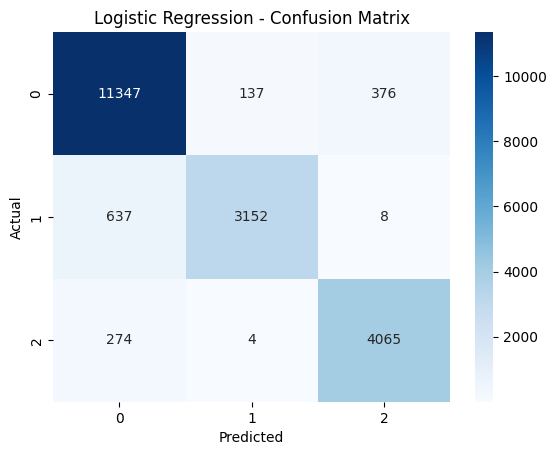

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = "/content/drive/MyDrive/MLAssignment/star_classification.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
drop_cols = ['obj_ID', 'spec_obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID']
df.drop(columns=drop_cols, inplace=True)

# Encode class column
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])  # Galaxy:0, QSO:1, Star:2

# Feature scaling
X = df.drop(columns=['class'])
y = df['class']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
